# Explorando a relação entre a Expectativa de Vida e o PIB (Produto Interno Bruto)

## Introdução

Nesse projeto, queremos analisar a relação existente entre a expectativa de vida e o produto interno bruto de seis países distintos. Para tal, iremos utilizar dados da OMS e do banco mundial, coletados entre 2000 e 2015, referentes aos países: Alemanha, Chile, China, Estados Unidos, México e Zimbabue.

Ao fim desse projeto, pretendemos responder as seguintes perguntas:

+ Qual a expectativa de vida média nos países? 
+ Qual o PIB médio dos países? 
+ A expectativa de vida cresceu com o tempo nos países?
+ O PIB cresceu com o tempo nos países?
+ Existe uma correlação entre a expectativa de vida e o PIB?


**Fontes dos dados**

- PIB: [Banco Mundial](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD).

- Expectativa de Vida: [Organização Mundial da Saúde](http://apps.who.int/gho/data/node.main.688)

Os dados incluem:

- `Country`: País de origem dos dados;
- `Year`: Ano em que os dados foram coletados;
- `Life expectancy at birth (years)`: Expectativa de vida ao nascer, em anos;
- `GDP`: Valor do PIB (Produto Interno Bruto) em US$.

## Importando Módulos

Iniciamos importando os módulos que serão utilizados na análise e visualização dos dados:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando os Dados

Seguimos fazendo o carregamentos dos nossos dados para um DataFrame, de forma que possam ser analisados e visualizados.

Aqui, os dados serão carregados para o DataFrame chamado `df`, seguidos por uma inspeção rápida das primeiras linhas do DataFrame para checarmos o seu conteúdo, usando o método `.head()`, assim como uma descrição estátistica de cada uma das colunas do DataFrame, utilizando o método `.describe(include = 'all')`, o valor `'all'` é atribuído ao parâmetro `include` do método para que seja incluída uma descrição estatística de todas as variáveis disponíveis no DataFrame, sejam elas qualitativas ou quantitativas. Por fim, verificamos se existem dados faltando no DataFrame utilizando o método `.info()`.

In [2]:
df = pd.read_csv('all_data.csv')  #carregando os dados do arquivo .csv para o DataFrame

df.head()  # Exibindo as primeiras 5 linhas do DataFrame

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.describe(include = 'all').round(2)  #descrição estatística das variáveis do DataFrame

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.00,96.00,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.50,72.79,3.880499e+12
std,NaN,4.63,10.67,5.197561e+12
min,NaN,2000.00,44.30,4.415703e+09
25%,NaN,2003.75,74.47,1.733018e+11
50%,NaN,2007.50,76.75,1.280220e+12
75%,NaN,2011.25,78.90,4.067510e+12


In [4]:
df.info()  # Verificando o tipo dos dados e se existem valores nulos no DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Da inspeção inicial dos dados, vemos que nossos dados foram medidos de 2000 a 2015 para seis países diferentes. Temos ao todo 96 entradas em nosso DataFrame, 16 para cada país, e nenhuma ocorrência de dados faltando. 

## Inspecionando os Dados

Primeiro, queremos descobrir quais são os países que estão inclusos nos dados:

In [5]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Temos seis países distintos representados nos dados: Alemana, Chile, China, Estados Unidos, México e Zimbabue

In [6]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Os dados incluem medidas que vão do ano 2000 até 2015.

### Alterando colunas

De forma a simplificar o processo de análise, iremos alterar o nome das colunas do DataFrame, removendo a capitalização das duas primeiras colunas e alterando o nome da terceira coluna de `Life expectancy at birth (years)` para `LEABY`.

In [7]:
df = df.rename(columns = {'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'LEABY'})

df.country = df.country.apply(lambda x: 'EUA' if x == 'United States of America' else x)
df.country = df.country.apply(lambda x: 'Alemanha' if x == 'Germany' else x)
df.country = df.country.apply(lambda x: 'Zimbabue' if x == 'Zimbabwe' else x)

df.head()

,country,year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Análise de Dados

Iniciamos a análise calculando a média da expectativa de vida e o PIB nos países do nosso DataFrame, para tanto, agrupamos o DataFrame com relação à coluna `country` e tiramos a média dos agrupamentos utilizando `.mean()`, abaixo temos as médias calculadas: 

In [29]:
dfMeans = df.drop("year", axis = 1).groupby('country').mean().reset_index()

dfMeans.sort_values('LEABY', ascending = False, inplace = True)
dfMeans.reset_index(drop = True, inplace = True)

print(dfMeans.round(2))

    country  LEABY           GDP
0  Alemanha  79.66  3.094776e+12
1     Chile  78.94  1.697888e+11
2       EUA  78.06  1.407500e+13
3    Mexico  75.72  9.766506e+11
4     China  74.26  4.957714e+12
5  Zimbabue  50.09  9.062580e+09


Vemos, portanto, que a maior expectativa de vida média é da Alemanha (Europa), com 79,66 anos, enquanto a menos expectativa de vida é do Zimbabue (África), com 50,09 anos. A expectativa de vida média dos países Alemanha, Chile, EUA, México e China é relativamente próxima, todas no intervalo 74-80 anos. 

Em um primeiro momento, podemos comparar esse resultado com os PIB médios dos países, de forma a elucidar sobre uma possível relação com as expectativas de vida médias.

In [28]:
dfMeans.sort_values('GDP', ascending = False, inplace = True)
dfMeans.reset_index(drop = True, inplace = True)

print(dfMeans.round(2))

    country  LEABY           GDP
0       EUA  78.06  1.407500e+13
1     China  74.26  4.957714e+12
2  Alemanha  79.66  3.094776e+12
3    Mexico  75.72  9.766506e+11
4     Chile  78.94  1.697888e+11
5  Zimbabue  50.09  9.062580e+09


Ao contrário do que acontece com a esperança de vida, estes resultados são muito diferentes. Os EUA têm o PIB total médio mais elevado, de 14 trilhões de dólares, enquanto o Zimbabué tem o PIB médio mais baixo, de 9 bilhões de dólares. O Chile tem o segundo PIB médio mais baixo, com 169,79 bilhões de dólares.

Assim, torna-se claro que a relação entre um PIB elevado e uma esperança de vida elevada não é clara. O país mais rico (EUA) não tem a esperança de vida mais elevada, apesar de o seu PIB médio ser superior ao dos restantes países, incluindo a Alemanha, cuja esperança de vida média era a mais elevada.

Apesar disso, o Zimbabue é o país com a menor expectativa de vida e também com o menor PIB médio, o que pode indicar uma relação entre esses indices.

De maneira a melhorar a comparação entre os dados, traçamos dois gráficos de barra abaixo, com a expectativa de vida média e o PIB médio nos países.

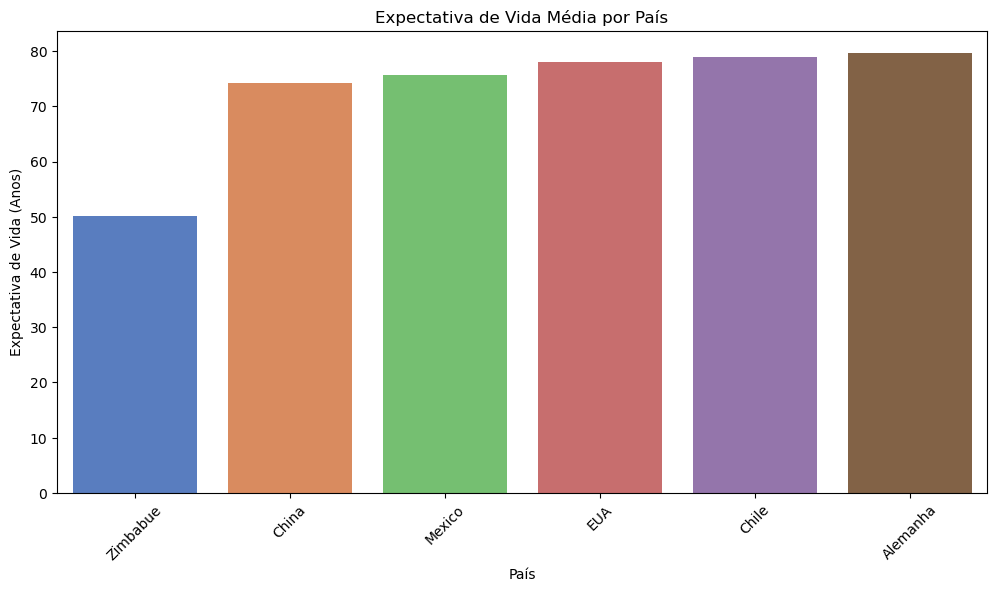

In [24]:
fig = plt.figure(figsize = (12, 6))

ax = plt.subplot()

sns.barplot(data = dfMeans, x = 'country', y = 'LEABY', order = dfMeans.sort_values('LEABY').country, palette = 'muted')
ax.set_xticklabels(labels = dfMeans.sort_values('LEABY').country.unique(), rotation = 45)
ax.set_ylabel('Expectativa de Vida (Anos)')
ax.set_xlabel('País')
ax.set_title('Expectativa de Vida Média por País')
plt.show()

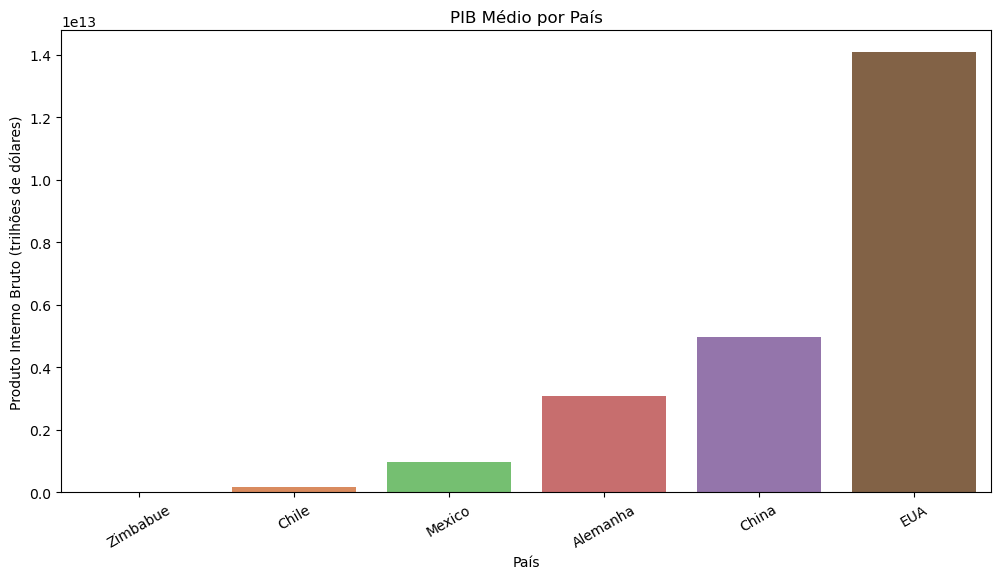

In [25]:
fig = plt.figure(figsize = (12, 6))

ax = plt.subplot()

sns.barplot(data = dfMeans, x = 'country', y = 'GDP', order = dfMeans.sort_values('GDP').country, palette = 'muted')
ax.set_xticklabels(dfMeans.sort_values('GDP').country.unique(), rotation = 30)
ax.set_ylabel('Produto Interno Bruto (trilhões de dólares)')
ax.set_xlabel('País')
ax.set_title('PIB Médio por País')
plt.show()

Analisando os gráficos traçados, fica clara a discrepância entre os PIBs dos países e um certo equilibrio na expectativa de vida média. 

Dessa análise, não é possível observar uma relação clara entre os indices. Por isso, foram traçados gráficos da evolução anual da expectativa de vida e do PIB de cada um dos seis países:

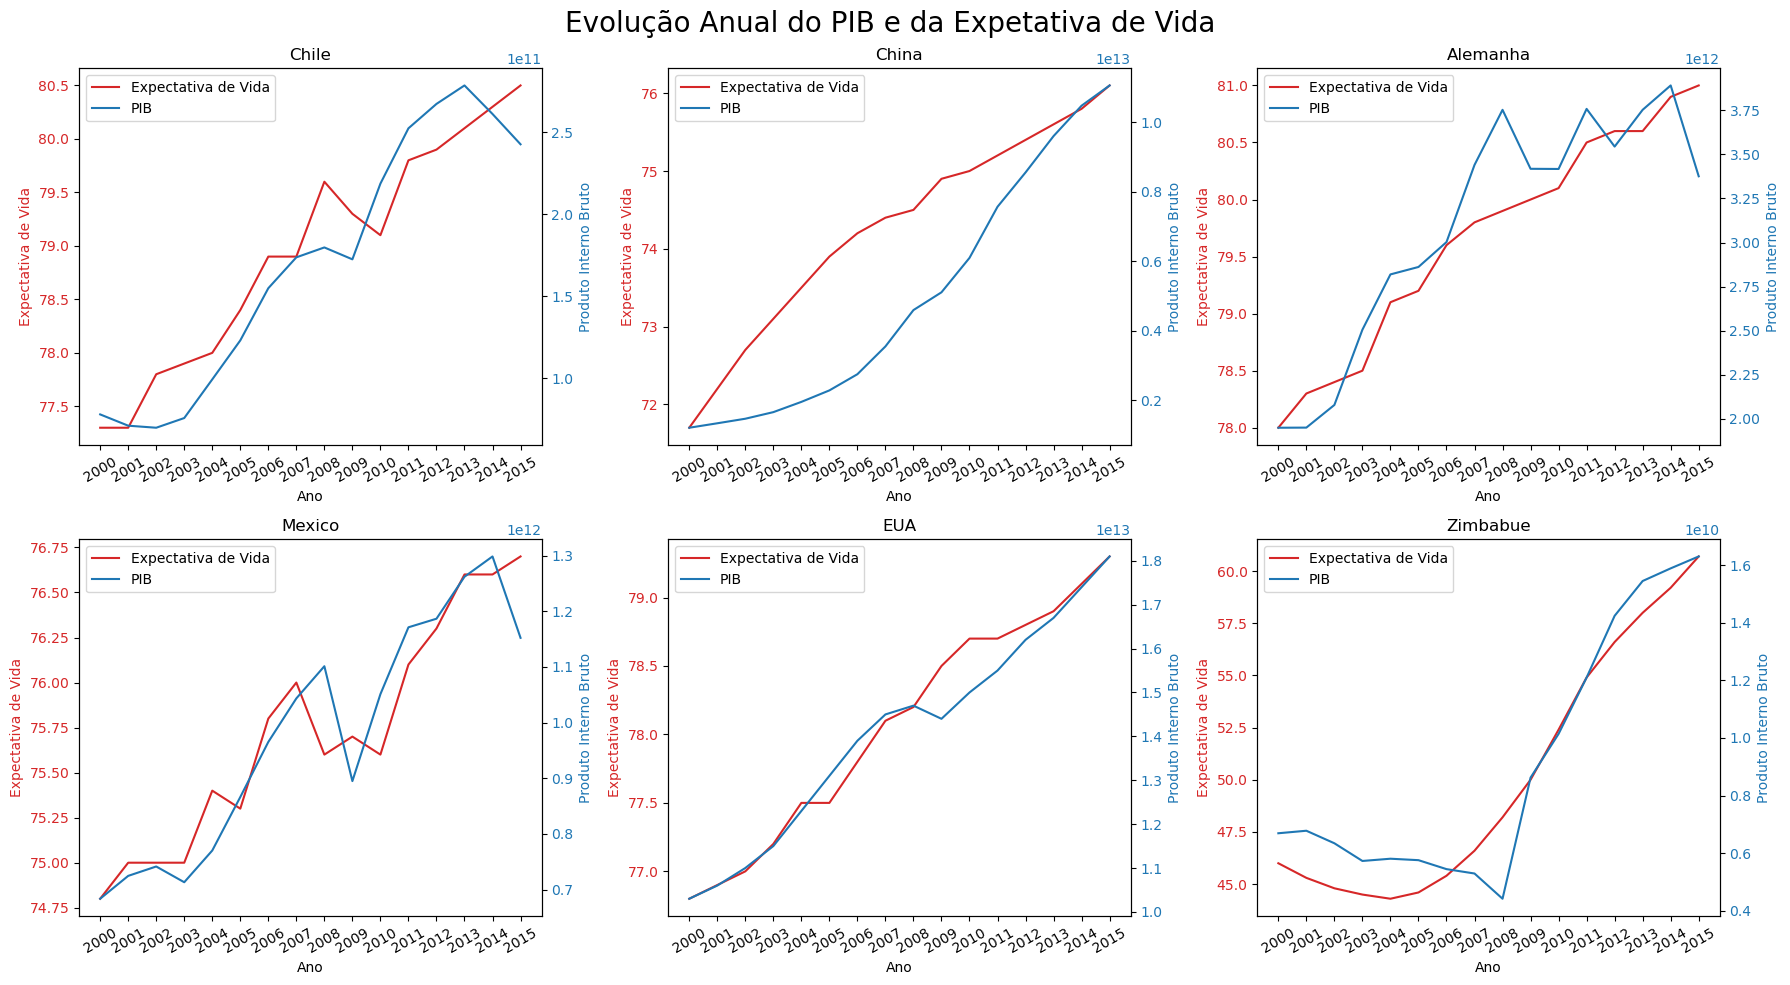

In [46]:
countries = list(df.country.unique())

fig, ax = plt.subplots(2,3, figsize = (18, 10))

i = 0

for row in ax:
    for col in row:
        col.set_xlabel('Ano')
        col.set_ylabel('Expectativa de Vida', color='tab:red')
        lns1 = col.plot(df.year[df.country == countries[i]], df.LEABY[df.country == countries[i]], color = 'tab:red', label = 'Expectativa de Vida')
        col.tick_params(axis='y', labelcolor='tab:red')
        
        ax2 = col.twinx()  

        ax2.set_ylabel('Produto Interno Bruto', color = 'tab:blue')  
        lns2 = ax2.plot(df.year[df.country == countries[i]], df.GDP[df.country == countries[i]], color = 'tab:blue', label = 'PIB')
        ax2.tick_params(axis='y', labelcolor = 'tab:blue')
        
        col.set_xticks(df.year.unique())
        col.set_xticklabels(df.year.unique(), rotation = 30)
        plt.title(countries[i])
        
        lns = lns1 + lns2
        labs = [l.get_label() for l in lns]
        plt.legend(lns, labs, loc=0)
        
        i += 1
    
    
fig.suptitle('Evolução Anual do PIB e da Expetativa de Vida ', fontsize = 20)        
fig.tight_layout()  
plt.show()

Fazendo com que a evolução da expectativa de vida e do PIB estivessem no mesmo gráfico, cada um com o seu eixo correspondente, podemos observar que existe uma tendência de crescimento positiva em ambos indicês que, a primeira vista, parecem estar intimamente relacionados. 

Para Alemanha, Chile, México, EUA e Zimbabue, o PIB e a expectativa de vida parecem andar de mãos dadas. Entretanto, em uma inspeção mais atenciosa, vemos que quando algum pais sofre uma queda ou elevação abrupta do PIB, não é sempre acompanhada por uma equivalente variação na expectativa de vida. 

Diferente dos outros países, a China apresenta um crescimento de PIB muito mais acentuado que o crescimento da expectativa de vida. Esse padrão pode estar relacionado com o altissimo crescimento econômico que o país asiático tem experienciado desde o inicio do século XXI. Entretanto, ambos os índices seguem apresentando uma tendência de crescimento. 

Para compreender verdadeiramente se o PIB afeta a expectativa de vida, se é que afeta, é necessário considerar a força da correlação entre estes índices. 

Assim, foram traçados gráficos de regressão linear e calculados os coeficientes de correlação de Pearson entre o PIB e a esperança de vida para cada um dos países.

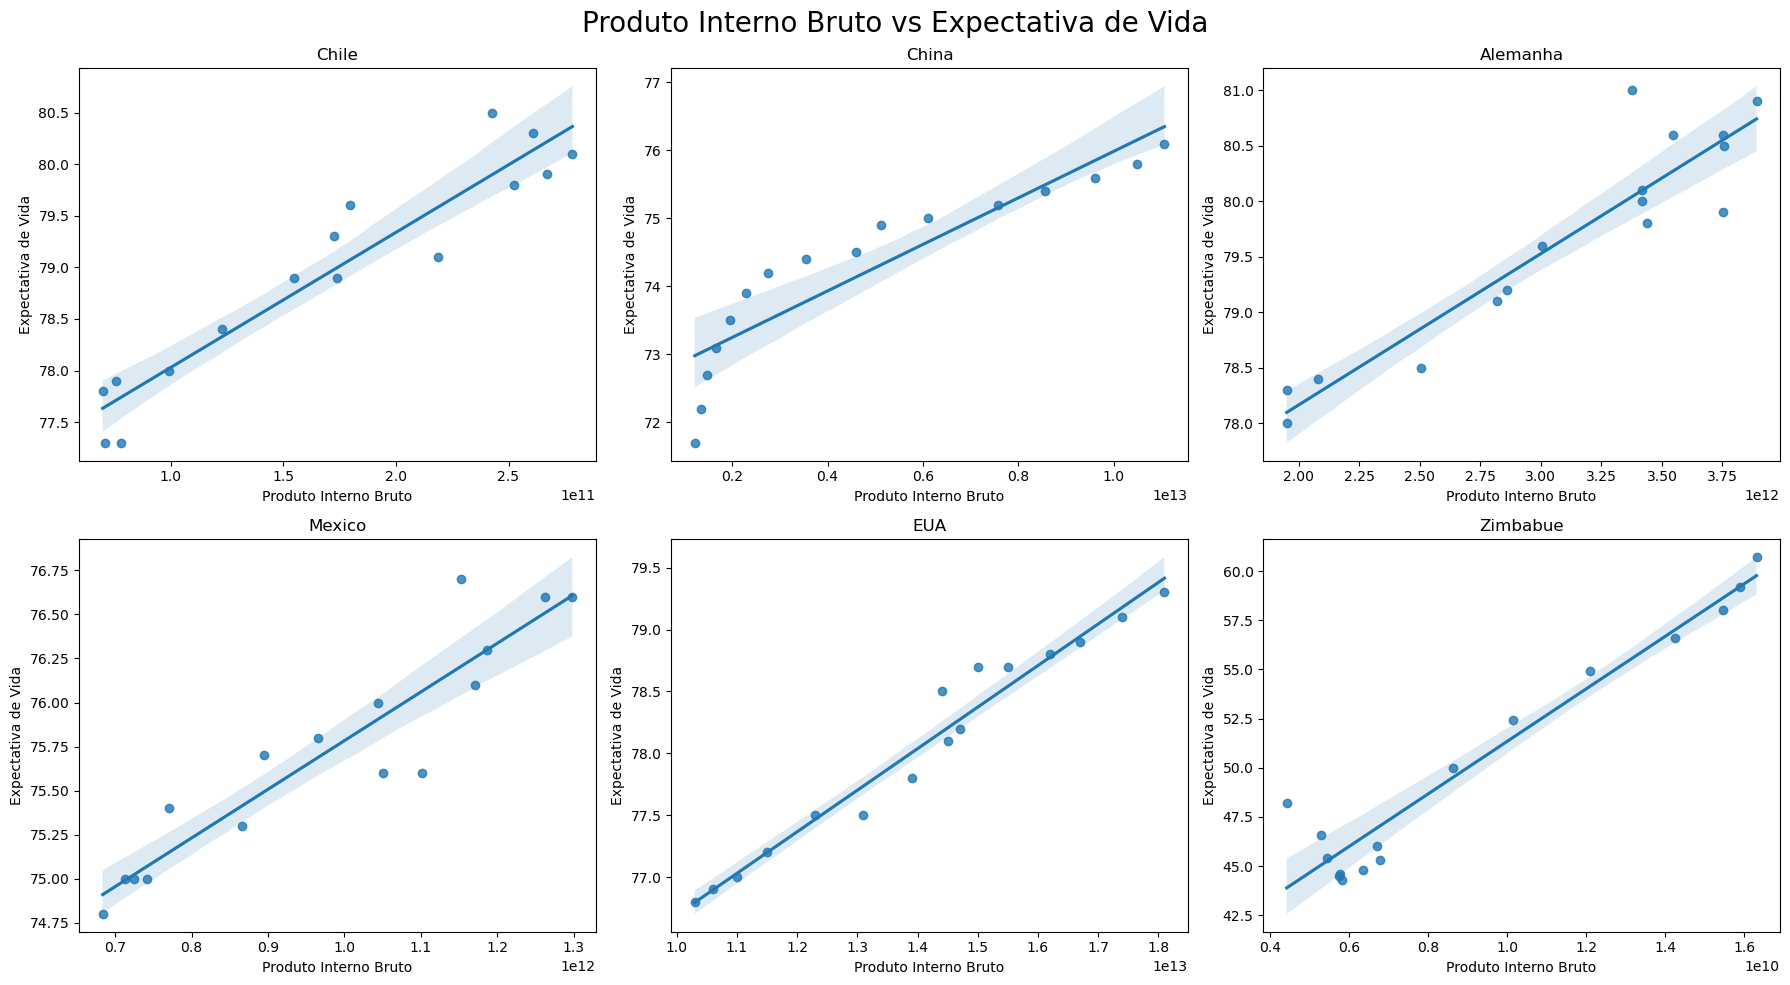

In [13]:
fig = plt.figure(figsize = (18, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    sns.regplot(data = df[df.country == countries[i]], x = 'GDP', y = 'LEABY')
    plt.title(countries[i])
    plt.xlabel('Produto Interno Bruto')
    plt.ylabel('Expectativa de Vida')
    
fig.suptitle('Produto Interno Bruto vs Expectativa de Vida', fontsize = 20)
fig.tight_layout()
plt.show()

In [14]:
from scipy.stats import pearsonr

correlations = []
p_values = []

for i in df.country.unique(): 
    corr, p = pearsonr(df.LEABY[df.country == i], df.GDP[df.country == i])
    correlations.append(corr)
    p_values.append(p)

print('Correlação entre o PIB e a Expectativa de Vida')

for i in range(6):    
    print(f'{df.country.unique()[i]}: {correlations[i]:.3f}')

Correlação entre o PIB e a Expectativa de Vida
Chile: 0.950
China: 0.909
Alemanha: 0.933
Mexico: 0.932
EUA: 0.982
Zimbabue: 0.966


Analisando os gráficos traçados da regressão linear entre o PIB anual e a expectativa média dos países, vemos que esses dois indices apresentam uma forte correlação positiva, principalmente os países: Alemanha, Chile, EUA, México e Zimbabue. Dos países analisados, o único que apresenta uma correlação que pode não ser linear é a China, essa correlação poderia ser melhor explorada com uma análise mais aprofundada.

Além disso, foram calculados os coeficientes de correlação de Pearson para os indices, que seguem:

- Chile: 0.950
- China: 0.909
- Alemanha: 0.933
- Mexico: 0.932
- EUA: 0.982
- Zimbabue: 0.966

## Conclusões

Há uma forte correlação positiva entre o PIB total e a expectativa de vida ao nascer para cada um dos seis países considerados, supondo-se uma relação linear entre as duas características.

Foi observada uma clara tendência positiva no PIB total e na expectativa de vida média ao nascer para cada país. Em termos gerais, as duas tendências parecem andar de mãos dadas em uma escala de tempo de 15 anos.

Em escalas de tempo curtas (ano a ano), esse nem sempre é o caso, já que durante alguns anos, quando o PIB mudou drasticamente, a expectativa de vida ao nascer não foi afetada ou teve uma mudança na direção oposta ao PIB.

Observando o PIB total médio e a expectativa de vida média ao nascer ao longo dos 15 anos, fica evidente que o PIB médio mais alto não corresponde à expectativa de vida média mais alta ao nascer, mesmo quando o PIB total médio é muito grande, como no caso dos EUA.

Em geral, embora haja uma correlação positiva, fica claro que o PIB não é o fator direto que afeta a expectativa de vida média ao nascer em um país. É possível que o PIB afete alguns outros fatores que, por sua vez, têm um impacto mais direto sobre a expectativa de vida. Por exemplo, o PIB pode afetar o acesso à educação e à saúde de forma diferente em diferentes países, ou o PIB pode estar correlacionado com a infraestrutura médica e o acesso às mais recentes inovações médicas em um país, e todos esses fatores podem ter um papel importante na determinação do tempo de vida de um indivíduo.